In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA


In [ ]:
# Читаем данные
df = pd.read_csv('Coffe_sales.csv')

In [7]:
# 1. Препроцессинг данных
# Сохраняем копию исходных данных
df_not_processed = df.copy()

# Преобразуем категориальные признаки
categorical_features = ['cash_type', 'coffee_name', 'Time_of_Day', 'Weekday', 'Month_name']
numerical_features = ['hour_of_day', 'money']

# Создаем пайплайн для обработки данных
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

# Применяем препроцессинг
X = preprocessor.fit_transform(df)

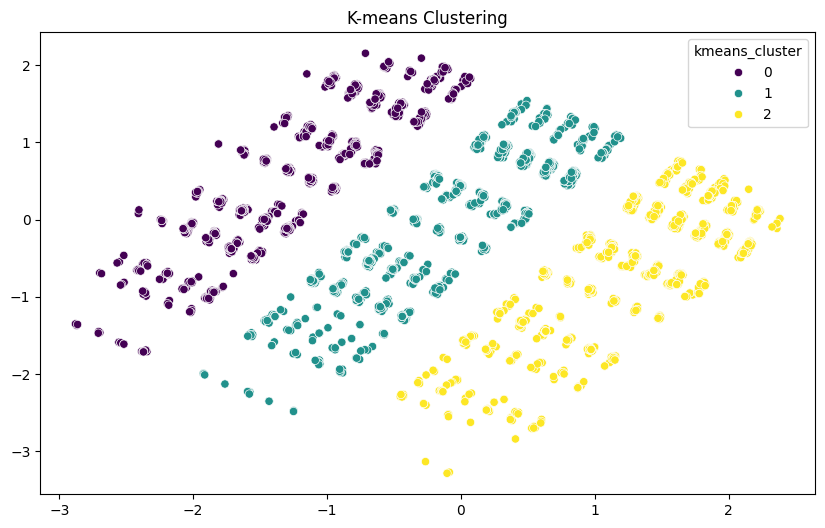

Silhouette Score: 0.17129013920026048


InvalidParameterError: The 'X' parameter of davies_bouldin_score must be an array-like. Got <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 24829 stored elements and shape (3547, 33)> instead.

In [8]:
# 2. K-means кластеризация
# Базовая кластеризация
kmeans = KMeans(n_clusters=3, random_state=42)
df_not_processed['kmeans_cluster'] = kmeans.fit_predict(X)

# Визуализация результатов
pca = PCA(2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_not_processed['kmeans_cluster'], palette='viridis')
plt.title('K-means Clustering')
plt.show()

# Метрики качества
print(f"Silhouette Score: {silhouette_score(X, df_not_processed['kmeans_cluster'])}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(X, df_not_processed['kmeans_cluster'])}")

# Статистика по кластерам
print(df_not_processed.groupby('kmeans_cluster').describe())


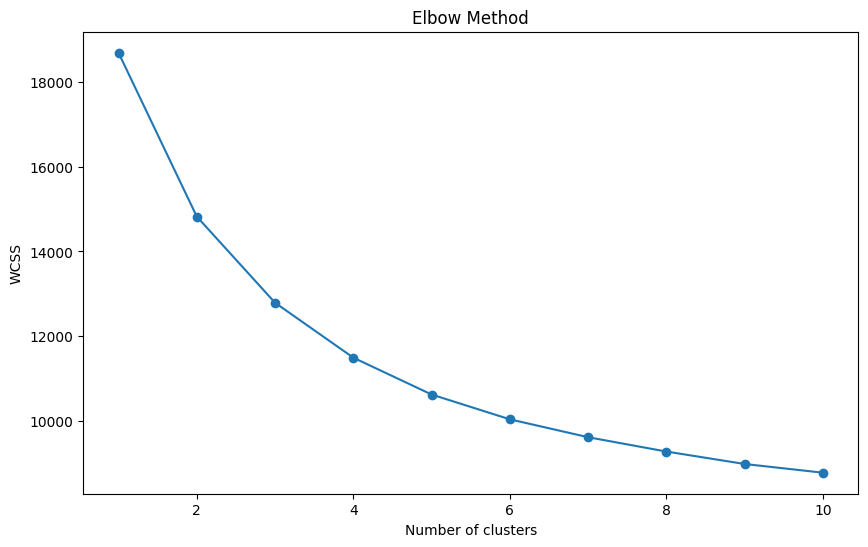

In [9]:
# 3. Метод локтя для определения оптимального числа кластеров
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,6))
plt.plot(range(1,11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

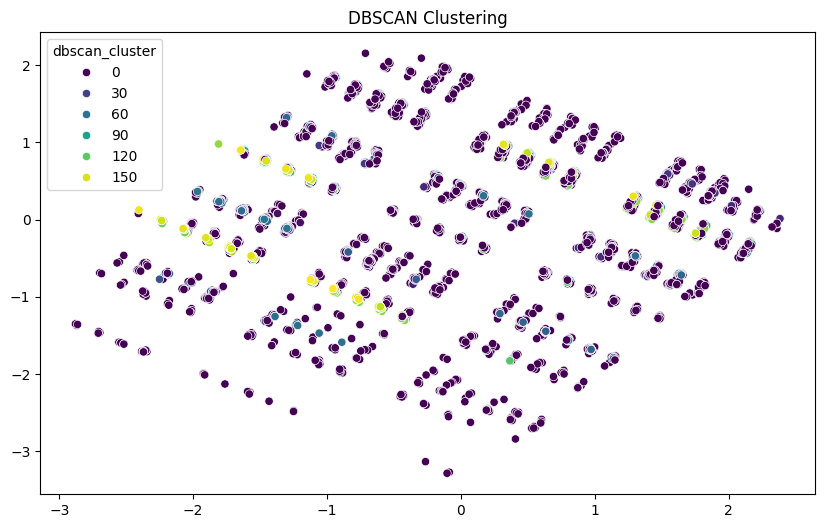

               hour_of_day                                                \
                     count       mean       std   min   25%   50%    75%   
dbscan_cluster                                                             
-1                  2479.0  14.362243  4.164432   6.0  11.0  14.0  18.00   
 0                     5.0  12.400000  0.894427  12.0  12.0  12.0  12.00   
 1                     7.0  14.285714  1.496026  12.0  13.5  14.0  15.50   
 2                     5.0  17.400000  0.547723  17.0  17.0  17.0  18.00   
 3                     5.0  15.200000  1.303840  13.0  15.0  16.0  16.00   
...                    ...        ...       ...   ...   ...   ...    ...   
 156                   5.0   8.000000  1.414214   6.0   8.0   8.0   8.00   
 157                   6.0  14.000000  1.095445  12.0  14.0  14.0  14.75   
 158                   5.0   8.400000  1.516575   7.0   7.0   8.0  10.00   
 159                   5.0  14.200000  1.303840  13.0  13.0  14.0  15.00   
 160        

In [10]:
# 4. DBSCAN кластеризация
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_not_processed['dbscan_cluster'] = dbscan.fit_predict(X)

# Визуализация
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df_not_processed['dbscan_cluster'], palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()

# Статистика
print(df_not_processed.groupby('dbscan_cluster').describe())


In [11]:
# 5. Сравнение методов
# K-means лучше подходит для этого датасета, так как:
# 1. Данные имеют относительно четкие границы между группами
# 2. Количество кластеров можно определить методом локтя
# 3. DBSCAN нашел много шума в данных
# 4. K-means показывает лучшие метрики качества

# Вывод результатов сравнения
print("Сравнение метрик:")
print(f"K-means Silhouette: {silhouette_score(X, df_not_processed['kmeans_cluster'])}")
print(f"DBSCAN Silhouette: {silhouette_score(X, df_not_processed['dbscan_cluster'])}")

Сравнение метрик:
K-means Silhouette: 0.17129013920026048
DBSCAN Silhouette: -0.10406348924882704
